In [24]:
import omegaqe
import numpy as np
from omegaqe.noise import Noise
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib.pyplot as plt
from omegaqe.qe import QE
import pandas as pd
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

In [25]:
%time _qe = QE(exp="S4")
_noise = Noise()
%time _noise.setup_cmb_noise()

CPU times: user 6min 47s, sys: 4.96 s, total: 6min 52s
Wall time: 52.8 s
CPU times: user 27.1 ms, sys: 14.2 ms, total: 41.3 ms
Wall time: 9.27 ms


In [26]:
%time _qe_base = QE(exp="S4_base")

CPU times: user 6min 50s, sys: 5.11 s, total: 6min 55s
Wall time: 52.5 s


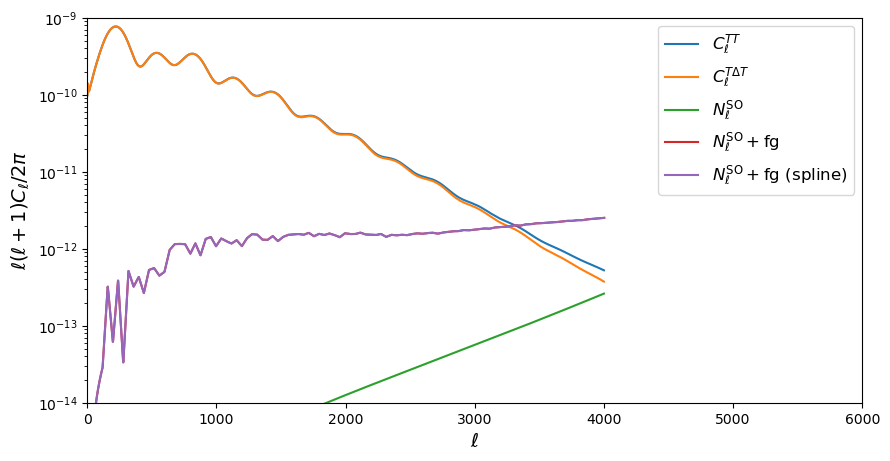

In [28]:
Ls = np.arange(1,4001)
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].lenCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{TT}$")
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["TT"].gradCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{T\Delta T}$")
plt.semilogy(Ls[10:], (Ls[10:]*(Ls[10:]+1))*_qe.cmb["TT"].N_spline(Ls[10:])/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}$")
N = _noise.get_cmb_gaussian_N("TT", None, None, exp="S4_base")[:6001]
Ls = np.arange(np.size(N))
plt.semilogy(Ls, (Ls*(Ls+1))*N/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}+\mathrm{fg}$")
plt.semilogy(Ls, (Ls*(Ls+1))*_qe_base.cmb["TT"].N_spline(Ls)/(2*np.pi), label="$N_{\ell}^{\mathrm{SO}}+\mathrm{fg}$ (spline)")
plt.ylim(1e-14, 1e-9)
plt.xlim(0, 6000)
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})

/var/folders/l5/slsmtchx3kq3pw0j_p03l58c00ysbg/T/ipykernel_9877/326819807.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 6000)


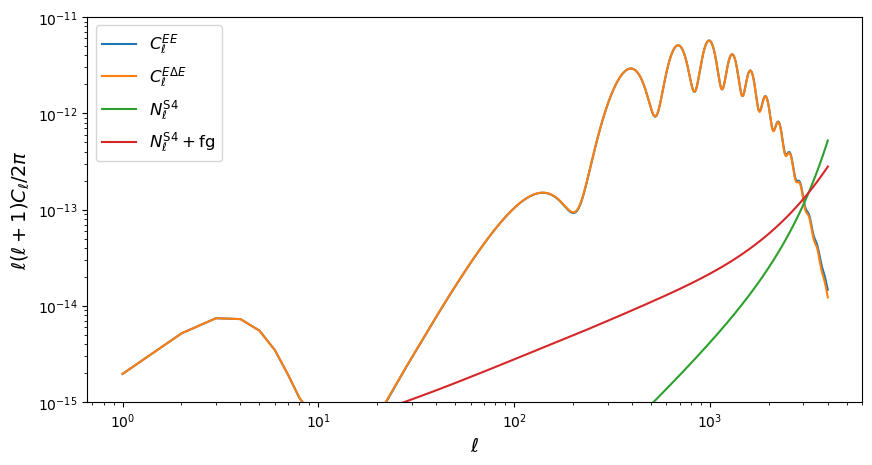

In [29]:
Ls = np.arange(1,4001)
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].lenCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{EE}$")
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["EE"].gradCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{E\Delta E}$")
plt.semilogy(Ls[10:], (Ls[10:]*(Ls[10:]+1))*_qe.cmb["EE"].N_spline(Ls[10:])/(2*np.pi), label="$N_{\ell}^{\mathrm{S4}}$")
N = _noise.get_cmb_gaussian_N("EE", None, None, exp="S4_base")[:6001]
Ls = np.arange(np.size(N))
plt.loglog(Ls, (Ls*(Ls+1))*N/(2*np.pi), label="$N_{\ell}^{\mathrm{S4}}+\mathrm{fg}$")
plt.ylim(1e-15, 1e-11)
plt.xlim(0, 6000)
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})

/var/folders/l5/slsmtchx3kq3pw0j_p03l58c00ysbg/T/ipykernel_9877/372445693.py:10: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(0, 6000)


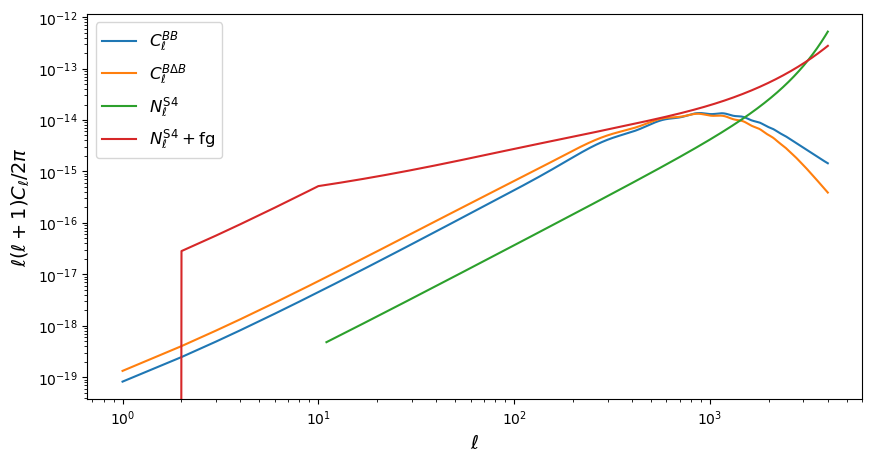

In [30]:
Ls = np.arange(1,4001)
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["BB"].lenCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{BB}$")
plt.semilogy(Ls, (Ls*(Ls+1))*_qe.cmb["BB"].gradCl_spline(Ls)/(2*np.pi), label="$C_{\ell}^{B\Delta B}$")
plt.semilogy(Ls[10:], (Ls[10:]*(Ls[10:]+1))*_qe.cmb["BB"].N_spline(Ls[10:])/(2*np.pi), label="$N_{\ell}^{\mathrm{S4}}$")
N = _noise.get_cmb_gaussian_N("BB", None, None, exp="S4_base")[:6001]
Ls = np.arange(np.size(N))
plt.loglog(Ls, (Ls*(Ls+1))*N/(2*np.pi), label="$N_{\ell}^{\mathrm{S4}}+\mathrm{fg}$")
# plt.ylim(1e-15, 1e-11)
plt.xlim(0, 6000)
plt.ylabel("$\ell(\ell+1)C_{\ell}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.legend(prop={'size': 12})

In [7]:
def get_N0(N0_file, typ):
    dict = {"TT": (1,8), "TE": (2,9), "EE": (3,10), "TB": (4,11), "EB": (5,12), "Pol": (6,13), "MV": (7,14)}
    phi_index, curl_index = dict[typ]
    df = pd.read_csv(N0_file, sep="\s+", header=None)
    return np.array(df[phi_index]), np.array(df[curl_index])

In [8]:
Lmax = 3000
Lmin = 30
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 100)
%time N0_curl_mine = _qe.normalisation(typ="TT", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)


CPU times: user 14.3 s, sys: 55.4 ms, total: 14.3 s
Wall time: 14.3 s


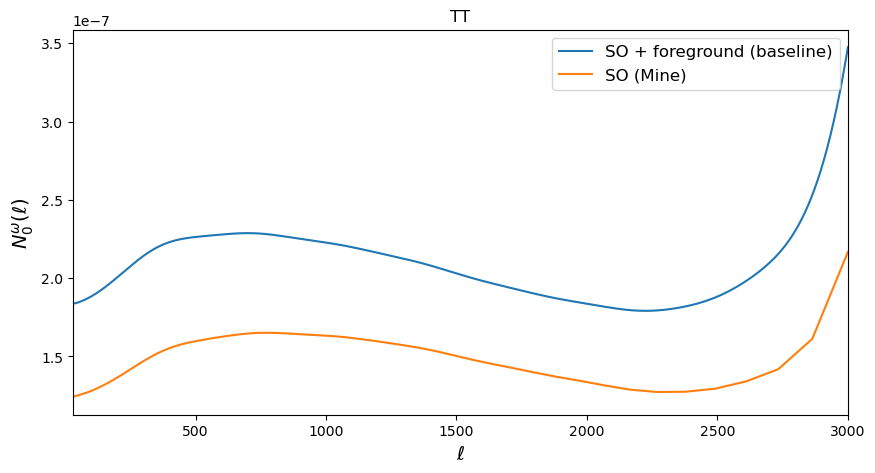

In [9]:
N0_file = f"{omegaqe.DATA_DIR}/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "TT")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO (Mine)")
plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("TT")
plt.show()

In [10]:
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 50)
%time N0_curl_mine = _qe.gmv_normalisation(fields="EB", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 33.7 s, sys: 264 ms, total: 34 s
Wall time: 33.6 s


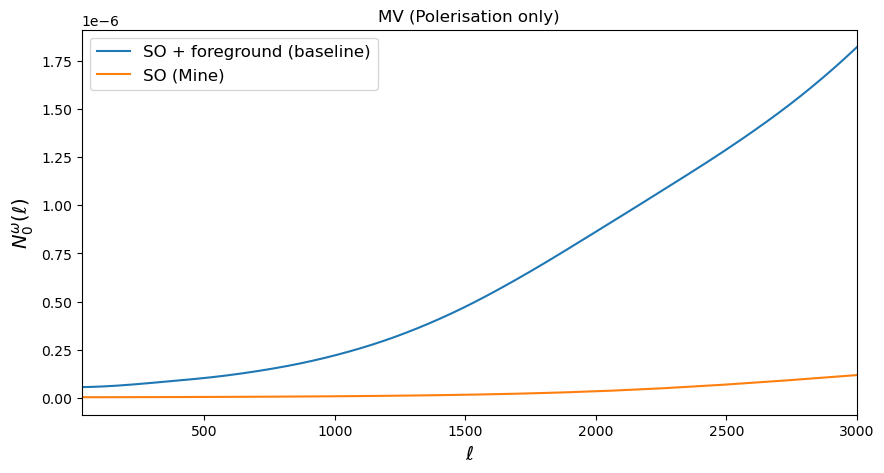

In [11]:
N0_file = f"{omegaqe.DATA_DIR}/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "Pol")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO (Mine)")
plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("MV (Polerisation only)")
plt.show()

In [12]:
Lmax = 3000
Lmin = 30
_qe = QE(exp="SO_base")

In [13]:
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 100)
%time N0_curl_mine = _qe.normalisation(typ="TT", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 14.2 s, sys: 34.7 ms, total: 14.3 s
Wall time: 14.3 s


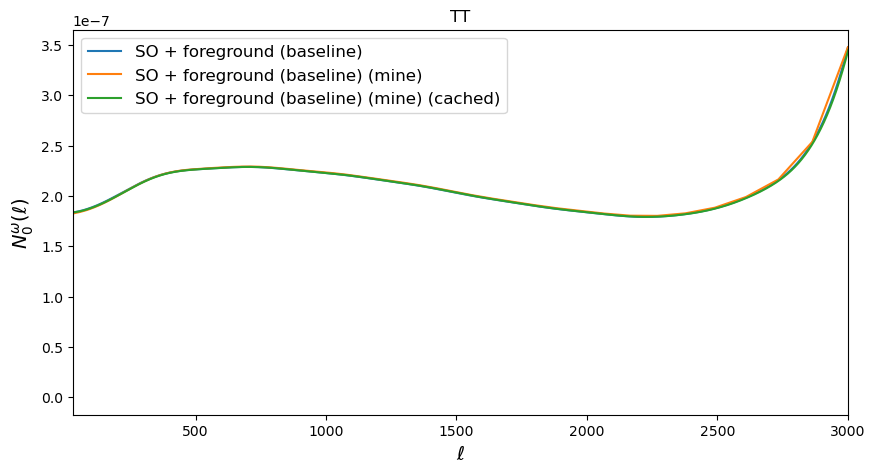

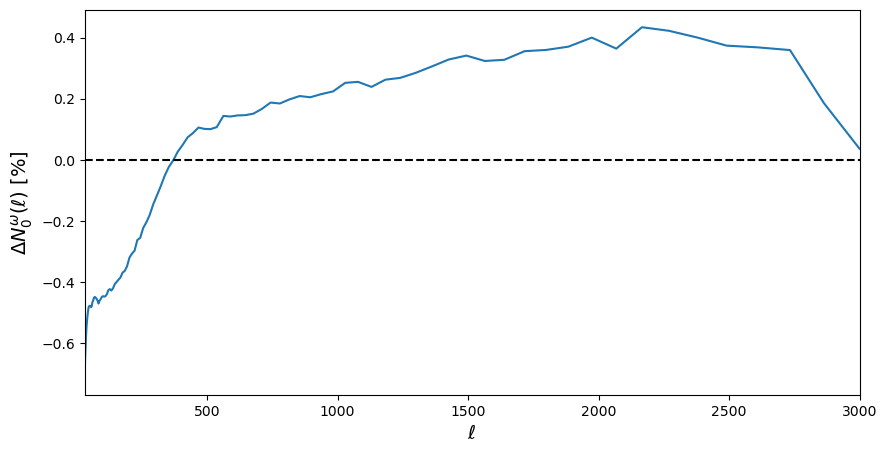

In [14]:
N0_file = f"{omegaqe.DATA_DIR}/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "TT")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[3:], N0_curl[3:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO + foreground (baseline) (mine)")

N0_cached = _noise.get_N0("omega", 3000, exp="SO_base", qe="TT", gmv=False, ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000, recalc_N0=True, iter=False)
Ls_cached = np.arange(2, np.size(N0_cached)+2)
plt.plot(Ls_cached, N0_cached, label="SO + foreground (baseline) (mine) (cached)")

plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("TT")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls, 100*((Ls)**4 *N0_curl_mine/4 - N0_curl_spline(Ls))/((Ls)**4 *N0_curl_mine/4), label="% Diff")
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.show()

In [15]:
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 20)
%time N0_curl_mine = _qe.gmv_normalisation(fields="TEB", Ls=Ls, curl=True, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)

CPU times: user 1min 6s, sys: 892 ms, total: 1min 6s
Wall time: 1min 5s


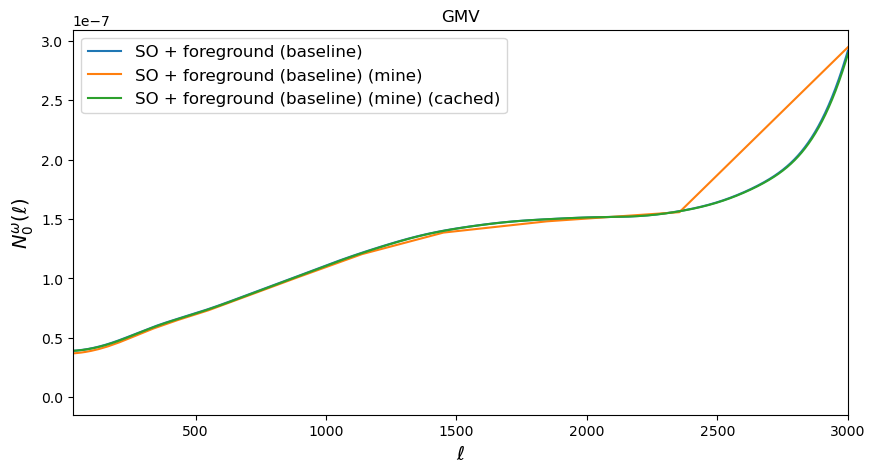

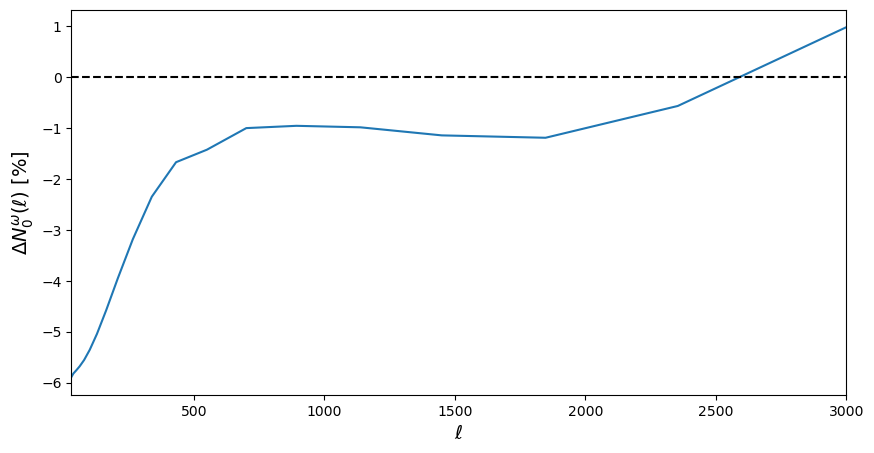

In [16]:
N0_file = f"{omegaqe.DATA_DIR}/SO_noise/nlkk_v3_1_0_deproj0_SENS1_fsky0p4_qe_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "MV")
N0_curl = N0[1][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="SO + foreground (baseline)")
plt.plot(Ls, (Ls)**4 *N0_curl_mine/4, label="SO + foreground (baseline) (mine)")

N0_cached = _noise.get_N0("omega", 3000, exp="SO_base", qe="TEB", gmv=True, ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000, recalc_N0=True, iter=False)
Ls_cached = np.arange(2, np.size(N0_cached)+2)
plt.plot(Ls_cached, N0_cached, label="SO + foreground (baseline) (mine) (cached)")


plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("GMV")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls, 100*((Ls)**4 *N0_curl_mine/4 - N0_curl_spline(Ls))/((Ls)**4 *N0_curl_mine/4), label="% Diff")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.show()

In [17]:
_qe = QE(exp="S4_base")

In [18]:
Lmax = 3000
Lmin = 30
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 100)
%time N0_curl_mine = _qe.normalisation(typ="TT", Ls=Ls, curl=False, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)


CPU times: user 15.3 s, sys: 31.1 ms, total: 15.3 s
Wall time: 15.3 s


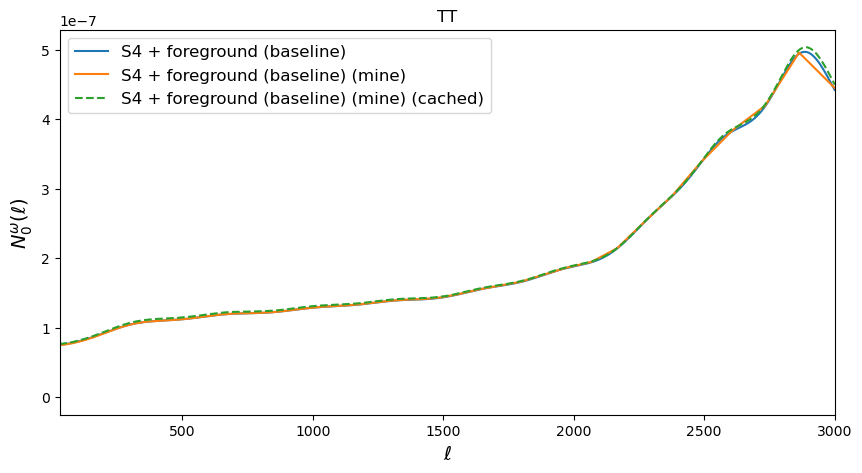

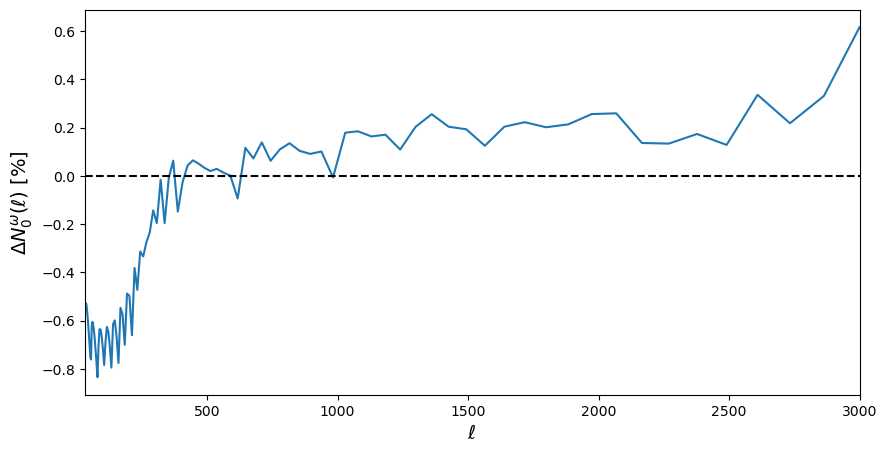

In [19]:
N0_file = f"{omegaqe.DATA_DIR}/S4_noise/kappa_deproj0_sens0_16000_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "TT")
N0_curl = N0[0][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="S4 + foreground (baseline)")
plt.plot(Ls, Ls**4 *N0_curl_mine/4, label="S4 + foreground (baseline) (mine)")
N0_cached = _noise.get_N0("kappa", 3000, exp="S4_base", qe="TT", gmv=False, ps="gradient", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000, recalc_N0=True, iter=False)
Ls_cached = np.arange(2, np.size(N0_cached)+2)
plt.plot(Ls_cached, N0_cached, label="S4 + foreground (baseline) (mine) (cached)", linestyle="--")


plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("TT")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls, 100*((Ls)**4 *N0_curl_mine/4 - N0_curl_spline(Ls))/((Ls)**4 *N0_curl_mine/4), label="% Diff")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.show()

In [20]:
Lmax = 3000
Lmin = 30
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 100)
%time N0_curl_mine = _qe.normalisation(typ="EE", Ls=Ls, curl=False, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)


CPU times: user 16 s, sys: 639 ms, total: 16.6 s
Wall time: 15.7 s


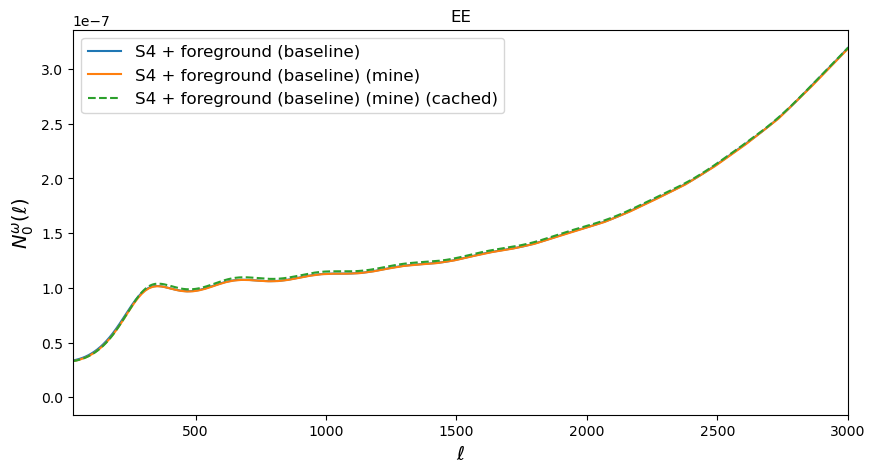

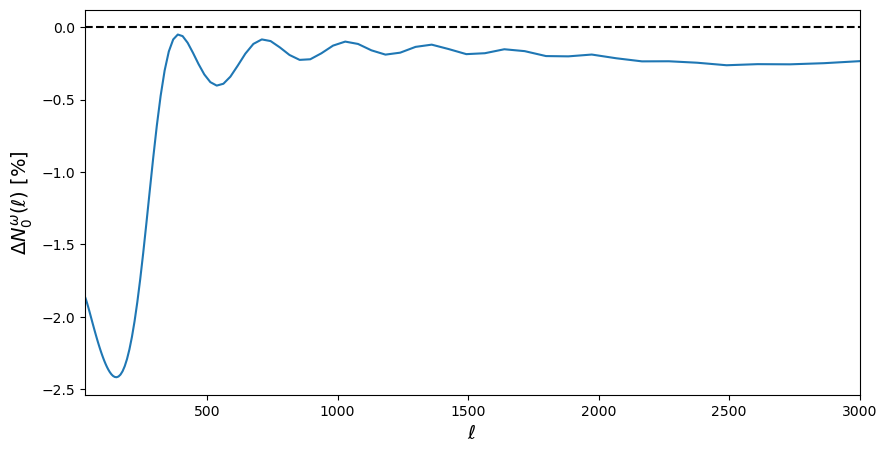

In [21]:
N0_file = f"{omegaqe.DATA_DIR}/S4_noise/kappa_deproj0_sens0_16000_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "EE")
N0_curl = N0[0][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="S4 + foreground (baseline)")
plt.plot(Ls, Ls**4 *N0_curl_mine/4, label="S4 + foreground (baseline) (mine)")
N0_cached = _noise.get_N0("kappa", 3000, exp="S4_base", qe="EE", gmv=False, ps="gradient", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000, recalc_N0=True, iter=False)
Ls_cached = np.arange(2, np.size(N0_cached)+2)
plt.plot(Ls_cached, N0_cached, label="S4 + foreground (baseline) (mine) (cached)", linestyle="--")


plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("EE")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls, 100*((Ls)**4 *N0_curl_mine/4 - N0_curl_spline(Ls))/((Ls)**4 *N0_curl_mine/4), label="% Diff")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.show()

In [22]:
Lmax = 3000
Lmin = 30
Ls = _qe.get_log_sample_Ls(Lmin, Lmax, 20)
%time N0_curl_mine = _qe.gmv_normalisation(fields="TEB", Ls=Ls, curl=False, resp_ps="lensed", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000)


CPU times: user 1min 10s, sys: 179 ms, total: 1min 11s
Wall time: 1min 10s


/var/folders/l5/slsmtchx3kq3pw0j_p03l58c00ysbg/T/ipykernel_9877/1870329776.py:24: RuntimeWarning: divide by zero encountered in divide
  plt.plot(Ls_iter, 100*(Ls_iter**2*(Ls_iter+1)**2*N0_iter/4 - N0_curl_spline(Ls_iter))/( Ls_iter**2*(Ls_iter+1)**2*N0_iter/4), label="% Diff")


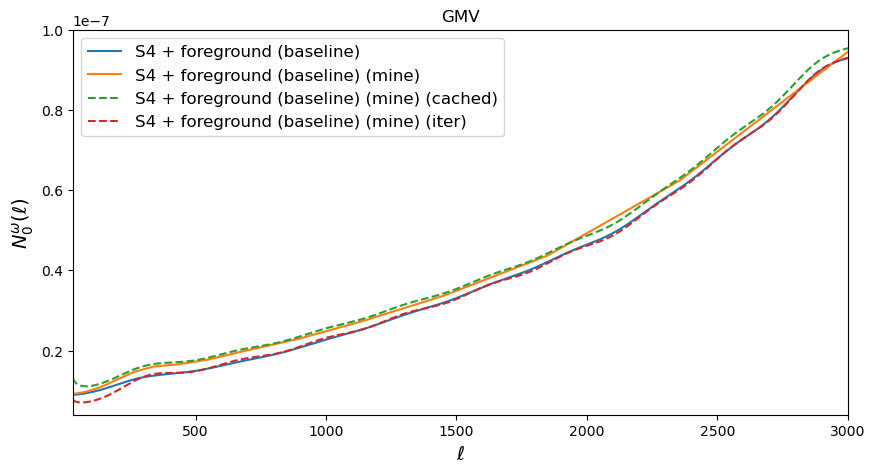

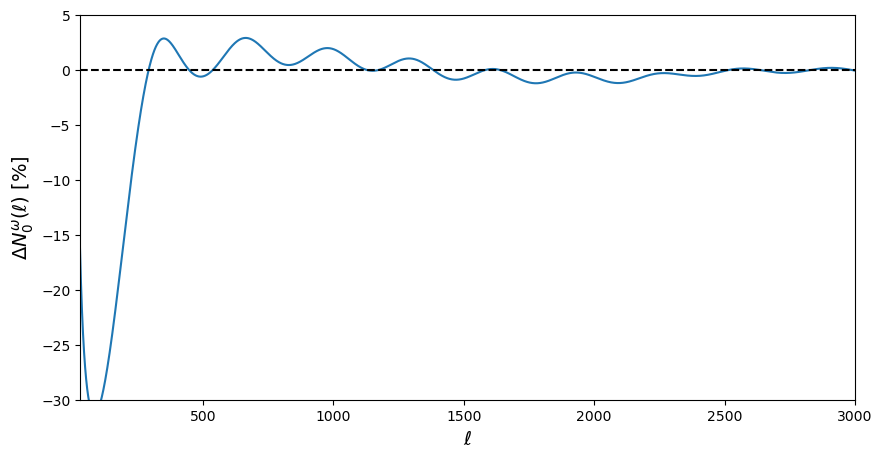

In [23]:
N0_file = f"{omegaqe.DATA_DIR}/S4_noise/kappa_deproj0_sens0_16000_lT30-3000_lP30-5000.dat"
N0 = get_N0(N0_file, "MV")
N0_curl = N0[0][:Lmax+1]
# N0_curl_file = np.load("cache/_N0_old/N0_lensit_my_SO_14_14_TQU.npy")[1][:Lmax+1]
ells = np.arange(np.size(N0_curl))
plt.plot(ells[Lmin:], N0_curl[Lmin:], label="S4 + foreground (baseline)")
plt.plot(Ls, Ls**4 *N0_curl_mine/4, label="S4 + foreground (baseline) (mine)")
N0_cached = _noise.get_N0("phi", 3000, exp="S4_base", qe="TEB", gmv=True, ps="gradient", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000, recalc_N0=True, iter=False)
Ls_cached = np.arange(2, np.size(N0_cached)+2)
plt.plot(Ls_cached, Ls_cached**2*(Ls_cached+1)**2*N0_cached/4, label="S4 + foreground (baseline) (mine) (cached)", linestyle="--")
N0_iter = _noise.get_N0("phi", 3000, exp="S4_base", qe="TEB", gmv=True, ps="gradient", T_Lmin=30, T_Lmax=3000, P_Lmin=30, P_Lmax=5000, recalc_N0=True, iter=True)
Ls_iter = np.arange(2, np.size(N0_iter)+2)
plt.plot(Ls_iter, Ls_iter**2*(Ls_iter+1)**2*N0_iter/4, label="S4 + foreground (baseline) (mine) (iter)", linestyle="--")
plt.xlim(30, Lmax)
plt.ylim(4e-9,1e-7)

plt.legend(prop={'size': 12})
plt.ylabel("$N^{\omega}_{0}(\ell)$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(Lmin, Lmax)
plt.title("GMV")
plt.figure()
N0_curl_spline = InterpolatedUnivariateSpline(ells[3:], N0_curl[3:])
plt.plot(Ls_iter, 100*(Ls_iter**2*(Ls_iter+1)**2*N0_iter/4 - N0_curl_spline(Ls_iter))/( Ls_iter**2*(Ls_iter+1)**2*N0_iter/4), label="% Diff")
plt.ylabel("$\Delta N^{\omega}_{0}(\ell)$ [%]", fontsize=14)
plt.plot([Lmin, Lmax], [0, 0], "--", color="k")
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(30, Lmax)
plt.ylim(-30,5)
plt.show()